In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('/lending_club_loan_two.csv')

In [5]:
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-15,Fully Paid,vacation,Vacation,26.24,Jun-90,16,0,36369,41.8,25,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-15,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-04,17,0,20131,53.3,27,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-15,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-07,13,0,11987,92.2,26,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-14,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-06,6,0,5472,21.5,13,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-13,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-99,13,0,24584,69.8,43,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000,60 months,10.99,217.38,B,B4,licensed bankere,2 years,RENT,40000.0,Source Verified,Oct-15,Fully Paid,debt_consolidation,Debt consolidation,15.63,Nov-04,6,0,1990,34.3,23,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\nJohnnyville, DC 30723"
396026,21000,36 months,12.29,700.42,C,C1,Agent,5 years,MORTGAGE,110000.0,Source Verified,Feb-15,Fully Paid,debt_consolidation,Debt consolidation,21.45,Feb-06,6,0,43263,95.7,8,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\nRachelborough, LA..."
396027,5000,36 months,9.99,161.32,B,B1,City Carrier,10+ years,RENT,56500.0,Verified,Oct-13,Fully Paid,debt_consolidation,pay off credit cards,17.56,Mar-97,15,0,32704,66.9,23,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\nReedfort, NY 70466"
396028,21000,60 months,15.31,503.02,C,C2,"Gracon Services, Inc",10+ years,MORTGAGE,64000.0,Verified,Aug-12,Fully Paid,debt_consolidation,Loanforpayoff,15.88,Nov-90,9,0,15704,53.8,20,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\nNew Michael, FL 2..."


In [6]:
explain=pd.read_csv('/lending_club_info.csv')

In [7]:
explain

,LoanStatNew,Description
0,loan_amnt,The listed amount of the loan applied for by t...
1,term,The number of payments on the loan. Values are...
2,int_rate,Interest Rate on the loan
3,installment,The monthly payment owed by the borrower if th...
4,grade,LC assigned loan grade
5,sub_grade,LC assigned loan subgrade
6,emp_title,The job title supplied by the Borrower when ap...
7,emp_length,Employment length in years. Possible values ar...
8,home_ownership,The home ownership status provided by the borr...
9,annual_inc,The self-reported annual income provided by th...


In [8]:
explain[explain['LoanStatNew']=='pub_rec_bankruptcies'].index[0]

27

In [9]:
def desp(x):
  k=explain[explain['LoanStatNew']==x].index[0]
  print(explain.iloc[k]['Description'])
  

In [10]:
desp('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


In [11]:
df.head(4)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-15,Fully Paid,vacation,Vacation,26.24,Jun-90,16,0,36369,41.8,25,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-15,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-04,17,0,20131,53.3,27,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-15,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-07,13,0,11987,92.2,26,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-14,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-06,6,0,5472,21.5,13,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  int64  
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [13]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


In [14]:
df.isnull()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
396026,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
396027,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
396028,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


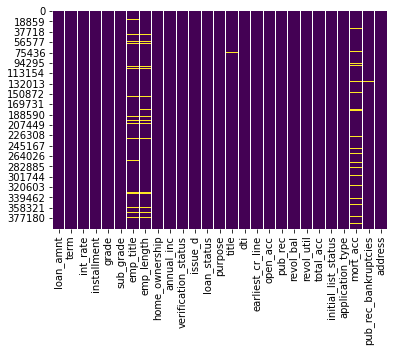

In [15]:
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

In [16]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [17]:
df['dti'].isnull()

0         False
1         False
2         False
3         False
4         False
          ...  
396025    False
396026    False
396027    False
396028    False
396029    False
Name: dti, Length: 396030, dtype: bool

In [18]:
df['earliest_cr_line'].isnull()

0         False
1         False
2         False
3         False
4         False
          ...  
396025    False
396026    False
396027    False
396028    False
396029    False
Name: earliest_cr_line, Length: 396030, dtype: bool

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


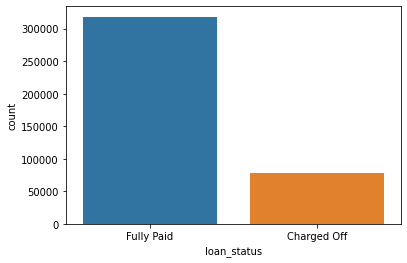

In [19]:
sns.countplot('loan_status',data=df)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


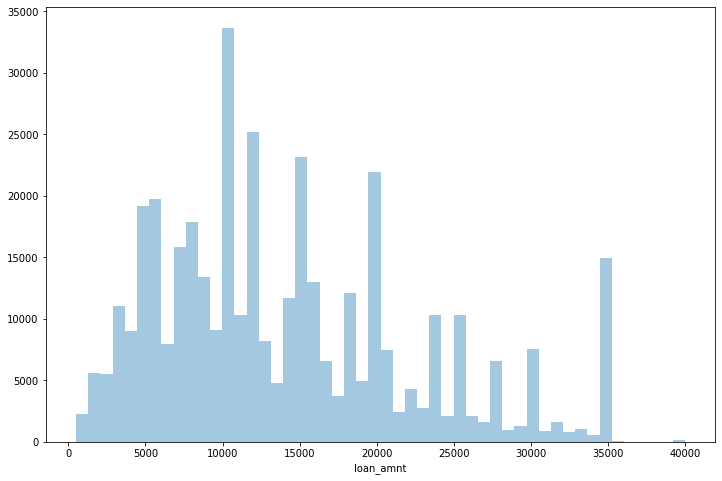

In [20]:
plt.figure(figsize=(12,8))
sns.distplot(df['loan_amnt'],kde=False)

In [21]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


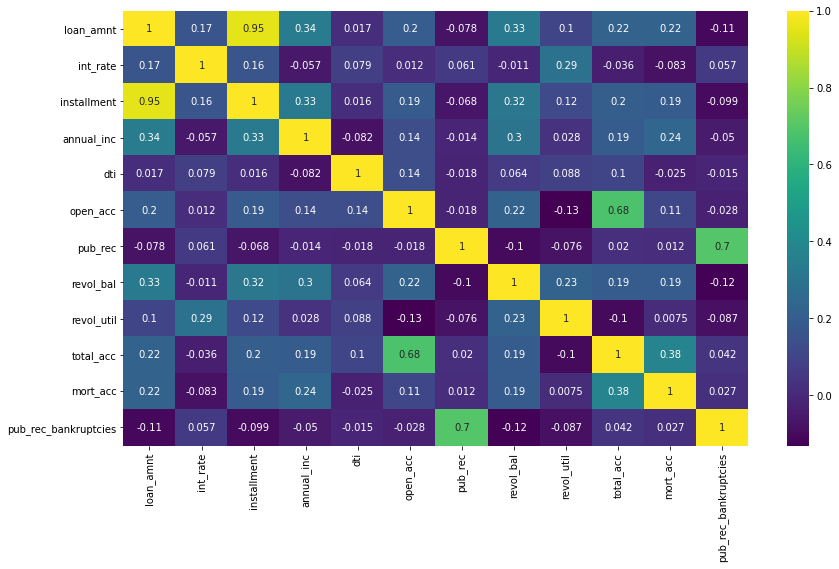

In [22]:
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(),cmap='viridis',annot=True)

In [23]:
##loan_amnt is higly correlated with installments

In [24]:
explain.columns

Index(['LoanStatNew', 'Description'], dtype='object')

In [25]:
explain.iloc[3]['Description']

'The monthly payment owed by the borrower if the loan originates.'

In [26]:
df['installment']

0         329.48
1         265.68
2         506.97
3         220.65
4         609.33
           ...  
396025    217.38
396026    700.42
396027    161.32
396028    503.02
396029     67.98
Name: installment, Length: 396030, dtype: float64

In [27]:
desp('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


In [28]:
df[['loan_amnt','installment']]

,loan_amnt,installment
0,10000,329.48
1,8000,265.68
2,15600,506.97
3,7200,220.65
4,24375,609.33
...,...,...
396025,10000,217.38
396026,21000,700.42
396027,5000,161.32
396028,21000,503.02


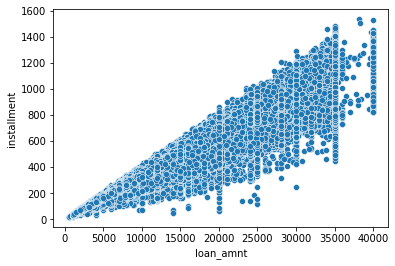

In [29]:
sns.scatterplot(x=df['loan_amnt'],y=df['installment'])

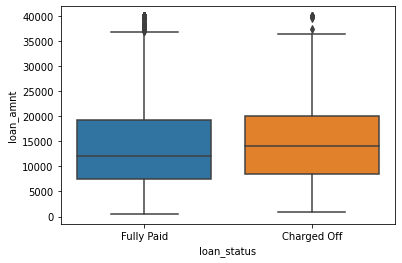

In [30]:
sns.boxplot(x='loan_status',y='loan_amnt',data=df)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


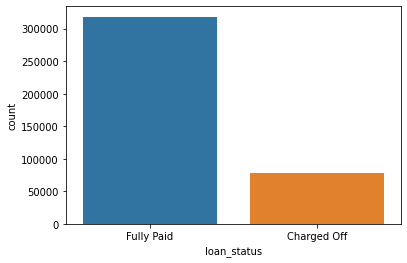

In [31]:
sns.countplot('loan_status',data=df)

In [32]:

df.head(3)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-15,Fully Paid,vacation,Vacation,26.24,Jun-90,16,0,36369,41.8,25,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-15,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-04,17,0,20131,53.3,27,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-15,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-07,13,0,11987,92.2,26,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"


In [33]:
df.groupby('loan_status').describe()

loan_amnt                                     ... pub_rec_bankruptcies               
                count          mean          std     min  ...                  25%  50%  75%  max
loan_status                                               ...                                    
Charged Off   77673.0  15126.300967  8505.090557  1000.0  ...                  0.0  0.0  0.0  8.0
Fully Paid   318357.0  13866.878771  8302.319699   500.0  ...                  0.0  0.0  0.0  8.0

[2 rows x 96 columns]

In [34]:
df=df.sort_values(by='sub_grade')

In [35]:
df['grade'].unique()

array(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype=object)

In [36]:
df['sub_grade'].unique()

array(['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1',
       'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3',
       'G4', 'G5'], dtype=object)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


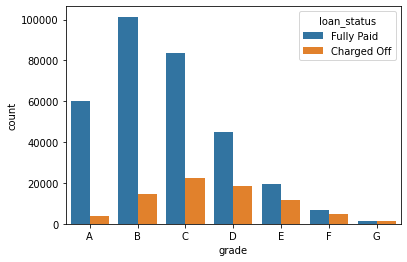

In [37]:
sns.countplot('grade',data=df,hue='loan_status')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


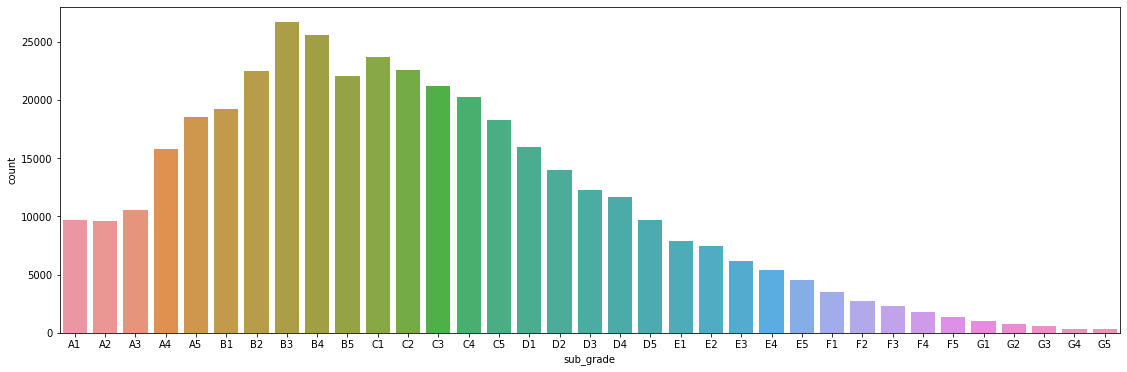

In [38]:
plt.figure(figsize=(19,6))
sns.countplot('sub_grade',data=df)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


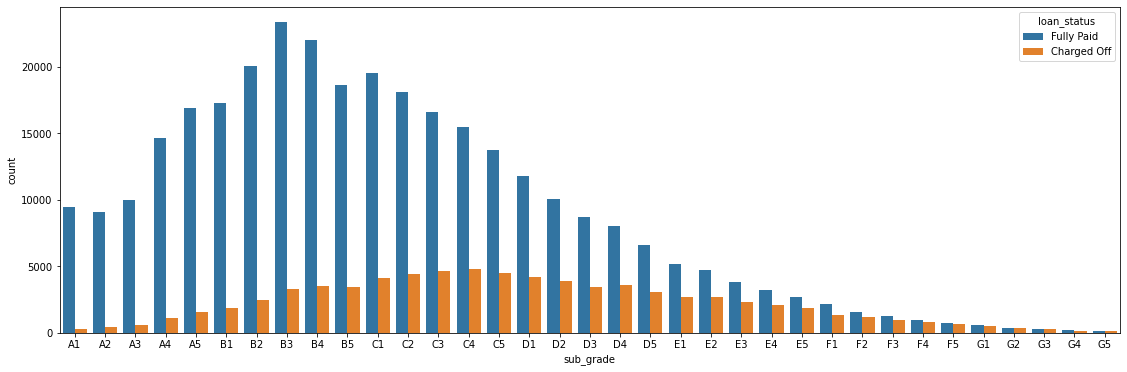

In [39]:
plt.figure(figsize=(19,6))
sns.countplot('sub_grade',data=df,hue='loan_status')

In [40]:
df=df.reset_index()

In [41]:
k=df[df['grade']=='F']

In [42]:
k=pd.concat([k,df[df['grade']=='G']])

In [43]:
k.head(5)

,index,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
381204,147237,10500,60 months,23.70,300.24,F,F1,Engineer,4 years,MORTGAGE,70000.0,Verified,Oct-13,Fully Paid,small_business,Business,9.10,Sep-06,4,0,4064,55.7,11,f,INDIVIDUAL,0.0,0.0,"5752 Michael Gateway\nWest Brooke, DE 05113"
381205,82240,22750,60 months,21.99,628.21,F,F1,Special Investigator,10+ years,MORTGAGE,55000.0,Verified,Jul-15,Fully Paid,home_improvement,Home improvement,14.31,Jul-03,8,0,6205,36.9,24,w,INDIVIDUAL,4.0,0.0,"4848 Timothy Pines Apt. 857\nJosephport, CA 30723"
381206,194026,34225,60 months,23.43,973.30,F,F1,Vice President,6 years,MORTGAGE,280000.0,Source Verified,Jul-14,Fully Paid,debt_consolidation,Debt consolidation,11.77,Jul-02,11,0,21524,69.2,31,w,INDIVIDUAL,1.0,0.0,"1975 Ramirez Junction Suite 816\nBriannaton, I..."
381207,274024,15050,60 months,22.99,424.19,F,F1,Law Office Manager,< 1 year,RENT,50700.0,Source Verified,May-15,Charged Off,debt_consolidation,Debt consolidation,26.86,Jun-03,10,0,14484,88.9,24,f,INDIVIDUAL,0.0,0.0,01173 Gamble Ports Suite 384\nLake Amandahaven...
381208,359717,18700,60 months,22.99,527.06,F,F1,Internet Sales Rep,7 years,MORTGAGE,52000.0,Not Verified,Apr-15,Charged Off,debt_consolidation,Debt consolidation,38.84,Dec-04,9,0,14606,53.9,21,f,INDIVIDUAL,1.0,0.0,"599 Jeffrey Turnpike\nWest Melissaberg, FL 70466"


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


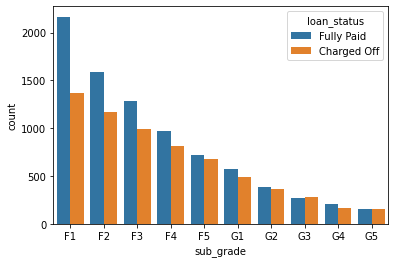

In [44]:

sns.countplot('sub_grade',data=k,hue='loan_status')

In [45]:
df.groupby('grade').describe().transpose()

grade                                   A  ...              G
index                count   64187.000000  ...    3054.000000
                     mean   198803.024366  ...  199656.089718
                     std    114083.817735  ...  113536.929059
                     min         3.000000  ...      87.000000
                     25%    100281.500000  ...  100762.500000
...                                   ...  ...            ...
pub_rec_bankruptcies min         0.000000  ...       0.000000
                     25%         0.000000  ...       0.000000
                     50%         0.000000  ...       0.000000
                     75%         0.000000  ...       0.000000
                     max         5.000000  ...       6.000000

[104 rows x 7 columns]

In [46]:
def loan_repay(x):
  if x=='Fully Paid':
    return 1
  if x=='Charged Off':
    return 0

In [47]:
df['loan_repaid']=df['loan_status'].apply(loan_repay)

In [48]:
df['loan_status'].value_counts()

Fully Paid     318357
Charged Off     77673
Name: loan_status, dtype: int64

In [49]:
df.head(3)

,index,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,58544,16000,36 months,6.03,486.97,A,A1,Waste Management,6 years,MORTGAGE,50000.0,Source Verified,Oct-12,Fully Paid,major_purchase,Pay Off,20.33,Sep-03,12,0,2463,14.0,28,f,INDIVIDUAL,2.0,0.0,"905 Krause Valley\nEast Adam, NE 00813",1
1,175506,12000,36 months,5.32,361.38,A,A1,IT Director,10+ years,RENT,97000.0,Verified,May-15,Fully Paid,debt_consolidation,Debt consolidation,0.31,Mar-95,12,0,48,0.0,32,w,INDIVIDUAL,0.0,0.0,"682 Fisher Divide\nWilliamsfort, SD 22690",1
2,288495,8000,36 months,5.32,240.92,A,A1,Project Manager (Consultant),< 1 year,OWN,140000.0,Not Verified,Oct-15,Fully Paid,credit_card,Credit card refinancing,11.01,Nov-93,11,0,10587,14.4,23,f,INDIVIDUAL,1.0,0.0,"3635 Lewis Light\nAudreyborough, NC 05113",1


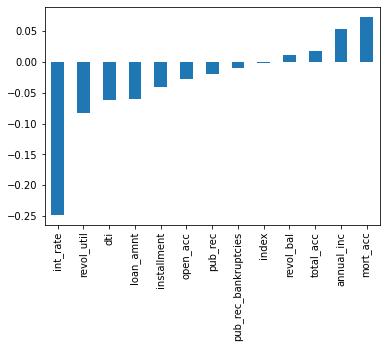

In [50]:
k=df.corrwith(df['loan_repaid']).sort_values()
k[:-1].plot(kind='bar')

In [51]:
desp('mort_acc')

Number of mortgage accounts.


In [52]:
df.drop(['index'],axis=1,inplace=True)

In [53]:
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,16000,36 months,6.03,486.97,A,A1,Waste Management,6 years,MORTGAGE,50000.0,Source Verified,Oct-12,Fully Paid,major_purchase,Pay Off,20.33,Sep-03,12,0,2463,14.0,28,f,INDIVIDUAL,2.0,0.0,"905 Krause Valley\nEast Adam, NE 00813",1
1,12000,36 months,5.32,361.38,A,A1,IT Director,10+ years,RENT,97000.0,Verified,May-15,Fully Paid,debt_consolidation,Debt consolidation,0.31,Mar-95,12,0,48,0.0,32,w,INDIVIDUAL,0.0,0.0,"682 Fisher Divide\nWilliamsfort, SD 22690",1
2,8000,36 months,5.32,240.92,A,A1,Project Manager (Consultant),< 1 year,OWN,140000.0,Not Verified,Oct-15,Fully Paid,credit_card,Credit card refinancing,11.01,Nov-93,11,0,10587,14.4,23,f,INDIVIDUAL,1.0,0.0,"3635 Lewis Light\nAudreyborough, NC 05113",1
3,24000,36 months,6.03,730.46,A,A1,Optometrist,10+ years,MORTGAGE,145000.0,Verified,Jan-15,Charged Off,debt_consolidation,Debt consolidation,15.98,Oct-86,15,0,44452,26.5,32,w,INDIVIDUAL,1.0,0.0,"22043 Monica Estates\nFieldschester, NC 11650",0
4,21000,36 months,6.03,639.15,A,A1,Director Revenue Integrity,< 1 year,RENT,105000.0,Source Verified,Jul-14,Fully Paid,credit_card,Credit card refinancing,12.49,Aug-97,11,0,21088,28.8,40,w,INDIVIDUAL,2.0,0.0,"06895 Kramer Canyon\nSouth Bernardhaven, CT 05113",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,25600,60 months,26.06,767.39,G,G5,project manager,4 years,MORTGAGE,80000.0,Source Verified,Jun-14,Fully Paid,debt_consolidation,Debt consolidation,21.41,Nov-00,16,0,24894,68.7,44,w,INDIVIDUAL,2.0,0.0,"241 Henderson Park\nLake Patrickchester, MD 48052",1
396026,25000,60 months,24.59,556.03,G,G5,NaN,6 years,MORTGAGE,200000.0,Verified,Jun-11,Fully Paid,other,Debt consolidation,14.95,Nov-87,25,0,43958,52.1,57,f,INDIVIDUAL,NaN,0.0,"28737 Graves Station\nWest Jacobland, OH 29597",1
396027,14325,60 months,26.06,429.41,G,G5,MSFW Specialist,3 years,RENT,84960.0,Source Verified,Aug-14,Fully Paid,debt_consolidation,Debt consolidation,24.75,Aug-90,17,1,14706,49.3,22,f,INDIVIDUAL,0.0,1.0,"PSC 3510, Box 5493\nAPO AE 22690",1
396028,25975,60 months,26.06,778.63,G,G5,Education Sales Coordinator,4 years,OWN,65000.0,Verified,Nov-13,Charged Off,small_business,Debt Reduction,15.60,Feb-04,12,1,7542,47.4,15,f,INDIVIDUAL,0.0,1.0,"1719 Mitchell Fields\nTraceyview, NJ 86630",0


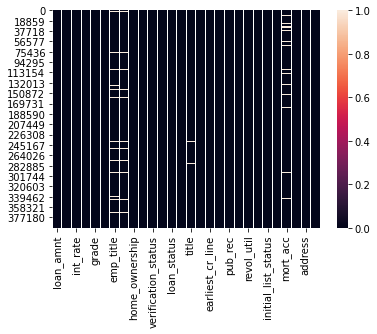

In [54]:
sns.heatmap(df.isnull())

In [55]:
d=df.isnull().sum()
d

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [56]:
(d/len(df))*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [57]:
desp('emp_title')

The job title supplied by the Borrower when applying for the loan.*


In [58]:
desp('emp_length')

Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


In [59]:
df['emp_title'].nunique()

173103

In [60]:
df['emp_title'].value_counts()

Teacher                           4389
Manager                           4250
Registered Nurse                  1856
RN                                1846
Supervisor                        1830
                                  ... 
Franklin County, Ohio                1
Legal Secretary/Office Manager       1
Desktop Administrator                1
Hospital Technician                  1
Sphc                                 1
Name: emp_title, Length: 173103, dtype: int64

In [61]:
df.drop(['emp_title'],axis=1,inplace=True)

In [62]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [63]:
emp_order=['< 1 year'
 '1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '10+ years']

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


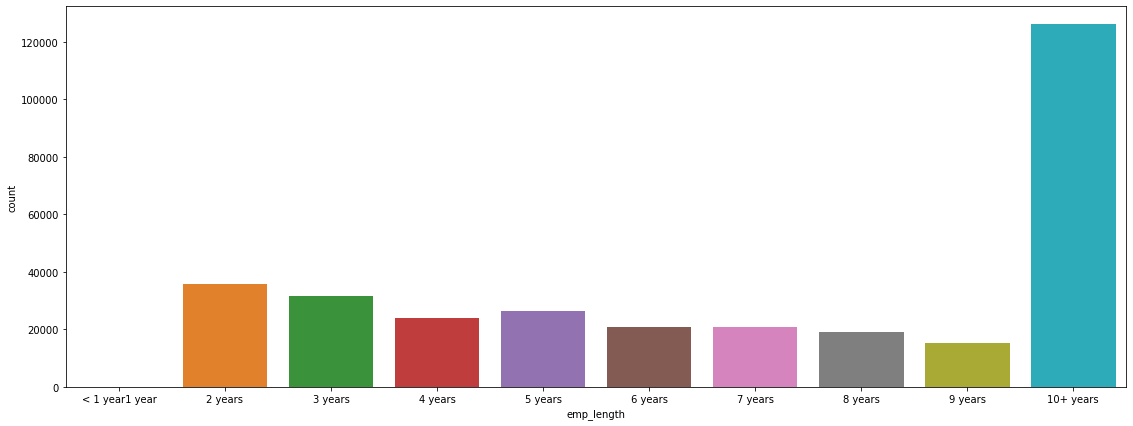

In [64]:
plt.figure(figsize=(19,7))
sns.countplot('emp_length',data=df,order=emp_order)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


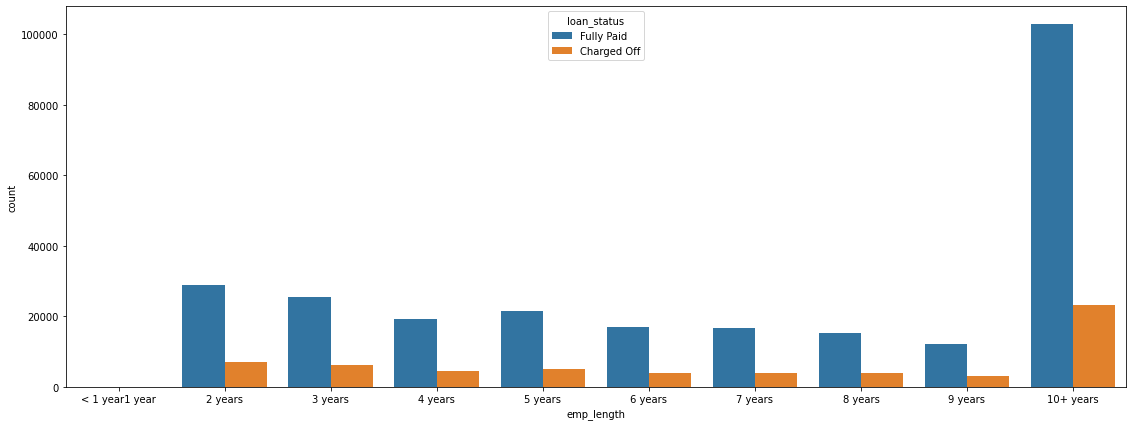

In [65]:
plt.figure(figsize=(19,7))
sns.countplot('emp_length',data=df,order=emp_order,hue='loan_status')

In [66]:
df.head(3)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,16000,36 months,6.03,486.97,A,A1,6 years,MORTGAGE,50000.0,Source Verified,Oct-12,Fully Paid,major_purchase,Pay Off,20.33,Sep-03,12,0,2463,14.0,28,f,INDIVIDUAL,2.0,0.0,"905 Krause Valley\nEast Adam, NE 00813",1
1,12000,36 months,5.32,361.38,A,A1,10+ years,RENT,97000.0,Verified,May-15,Fully Paid,debt_consolidation,Debt consolidation,0.31,Mar-95,12,0,48,0.0,32,w,INDIVIDUAL,0.0,0.0,"682 Fisher Divide\nWilliamsfort, SD 22690",1
2,8000,36 months,5.32,240.92,A,A1,< 1 year,OWN,140000.0,Not Verified,Oct-15,Fully Paid,credit_card,Credit card refinancing,11.01,Nov-93,11,0,10587,14.4,23,f,INDIVIDUAL,1.0,0.0,"3635 Lewis Light\nAudreyborough, NC 05113",1


In [67]:
x=df[df['loan_repaid']==0]
x2=df[df['loan_repaid']==1]

In [68]:
k=x2.groupby('emp_length').count()['loan_repaid']  ##series
k

emp_length
1 year        20728
10+ years    102826
2 years       28903
3 years       25483
4 years       19344
5 years       21403
6 years       16898
7 years       16764
8 years       15339
9 years       12244
< 1 year      25162
Name: loan_repaid, dtype: int64

In [69]:
ser=x.groupby('emp_length').count()['loan_repaid']
ser

emp_length
1 year        5154
10+ years    23215
2 years       6924
3 years       6182
4 years       4608
5 years       5092
6 years       3943
7 years       4055
8 years       3829
9 years       3070
< 1 year      6563
Name: loan_repaid, dtype: int64

In [70]:

loan=pd.DataFrame(data=k)

In [71]:
loan=pd.concat([loan,ser],axis=1)

In [72]:
loan.columns=['repay_loan','cannot_repay_loan']

In [73]:
loan

,repay_loan,cannot_repay_loan
emp_length,,
1 year,20728,5154
10+ years,102826,23215
2 years,28903,6924
3 years,25483,6182
4 years,19344,4608
5 years,21403,5092
6 years,16898,3943
7 years,16764,4055
8 years,15339,3829


In [74]:
loan['percent charged off']=loan['cannot_repay_loan']/loan['repay_loan']

In [75]:
loan

,repay_loan,cannot_repay_loan,percent charged off
emp_length,,,
1 year,20728,5154,0.248649
10+ years,102826,23215,0.225770
2 years,28903,6924,0.239560
3 years,25483,6182,0.242593
4 years,19344,4608,0.238213
5 years,21403,5092,0.237911
6 years,16898,3943,0.233341
7 years,16764,4055,0.241887
8 years,15339,3829,0.249625


In [76]:
loan.columns=['repay_loan','cannot_repay_loan','cannot_repay_loan/repay_loan']

In [77]:
loan['percent charged off']=loan['cannot_repay_loan']/(loan['repay_loan']+loan['cannot_repay_loan'])

In [78]:
loan

,repay_loan,cannot_repay_loan,cannot_repay_loan/repay_loan,percent charged off
emp_length,,,,
1 year,20728,5154,0.248649,0.199135
10+ years,102826,23215,0.225770,0.184186
2 years,28903,6924,0.239560,0.193262
3 years,25483,6182,0.242593,0.195231
4 years,19344,4608,0.238213,0.192385
5 years,21403,5092,0.237911,0.192187
6 years,16898,3943,0.233341,0.189194
7 years,16764,4055,0.241887,0.194774
8 years,15339,3829,0.249625,0.199760


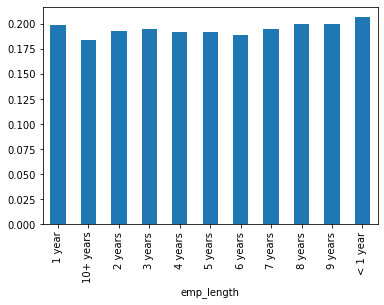

In [79]:
loan['percent charged off'].plot(kind='bar')

In [80]:
df.drop(['emp_length'],axis=1,inplace=True)

In [81]:
df.head(4)

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,16000,36 months,6.03,486.97,A,A1,MORTGAGE,50000.0,Source Verified,Oct-12,Fully Paid,major_purchase,Pay Off,20.33,Sep-03,12,0,2463,14.0,28,f,INDIVIDUAL,2.0,0.0,"905 Krause Valley\nEast Adam, NE 00813",1
1,12000,36 months,5.32,361.38,A,A1,RENT,97000.0,Verified,May-15,Fully Paid,debt_consolidation,Debt consolidation,0.31,Mar-95,12,0,48,0.0,32,w,INDIVIDUAL,0.0,0.0,"682 Fisher Divide\nWilliamsfort, SD 22690",1
2,8000,36 months,5.32,240.92,A,A1,OWN,140000.0,Not Verified,Oct-15,Fully Paid,credit_card,Credit card refinancing,11.01,Nov-93,11,0,10587,14.4,23,f,INDIVIDUAL,1.0,0.0,"3635 Lewis Light\nAudreyborough, NC 05113",1
3,24000,36 months,6.03,730.46,A,A1,MORTGAGE,145000.0,Verified,Jan-15,Charged Off,debt_consolidation,Debt consolidation,15.98,Oct-86,15,0,44452,26.5,32,w,INDIVIDUAL,1.0,0.0,"22043 Monica Estates\nFieldschester, NC 11650",0


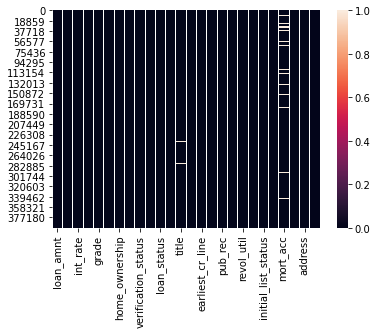

In [82]:
sns.heatmap(df.isnull())

In [83]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [84]:
##title, revol_util,mort_acc,pub_rec_bankruptcies have still missing values

In [85]:
df['purpose'].unique()

array(['major_purchase', 'debt_consolidation', 'credit_card',
       'home_improvement', 'car', 'other', 'medical', 'house',
       'small_business', 'moving', 'vacation', 'renewable_energy',
       'wedding', 'educational'], dtype=object)

In [86]:
df['title'].unique()

array(['Pay Off', 'Debt consolidation', 'Credit card refinancing', ...,
       'Need capital to make adjustments', 'remodling', 'SON IN COLLEGE'],
      dtype=object)

In [87]:
desp('purpose')

A category provided by the borrower for the loan request. 


In [88]:
desp('title')

The loan title provided by the borrower


In [89]:
df.drop(['title'],axis=1,inplace=True)

In [90]:
df['purpose'].nunique()

14

In [91]:
df['mort_acc']

0         2.0
1         0.0
2         1.0
3         1.0
4         2.0
         ... 
396025    2.0
396026    NaN
396027    0.0
396028    0.0
396029    0.0
Name: mort_acc, Length: 396030, dtype: float64

In [92]:
desp('mort_acc')

Number of mortgage accounts.


In [93]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
31.0         2
32.0         2
26.0         2
23.0         2
28.0         1
30.0         1
34.0         1
Name: mort_acc, dtype: int64

In [94]:
##see here to fill mort accounts values there are a lot of options so we will see the correlation of mort accounts with other features

In [95]:
df.corrwith(df['mort_acc']).sort_values(ascending=False)

mort_acc                1.000000
total_acc               0.381072
annual_inc              0.236320
loan_amnt               0.222315
revol_bal               0.194925
installment             0.193694
open_acc                0.109205
loan_repaid             0.073111
pub_rec_bankruptcies    0.027239
pub_rec                 0.011552
revol_util              0.007514
dti                    -0.025439
int_rate               -0.082583
dtype: float64

In [96]:
desp('total_acc')

The total number of credit lines currently in the borrower's credit file


In [97]:
df['total_acc'].value_counts()

21     14280
22     14260
20     14228
23     13923
24     13878
       ...  
108        1
104        1
103        1
100        1
151        1
Name: total_acc, Length: 118, dtype: int64

In [98]:
mort=df.dropna().groupby('total_acc').mean()['mort_acc']

In [99]:
mort

total_acc
2      0.000000
3      0.052326
4      0.066743
5      0.102108
6      0.151123
         ...   
124    1.000000
129    1.000000
135    3.000000
150    2.000000
151    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [100]:
mort[3]

0.05232558139534884

In [101]:
def fillin_values(total_acc,mort_acc):
  if np.isnan(mort_acc):
    return mort[total_acc]
  else:
    return mort_acc

In [102]:
df['mort_acc']=df.apply(lambda x: fillin_values(x['total_acc'],x['mort_acc']),axis=1)

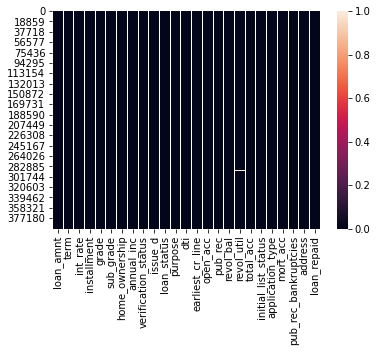

In [103]:
sns.heatmap(df.isnull())

In [104]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

In [105]:
desp('revol_util')

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [106]:
df.corrwith(df['revol_util']).sort_values(ascending=False)

revol_util              1.000000
int_rate                0.293659
revol_bal               0.226346
installment             0.123915
loan_amnt               0.099911
dti                     0.088375
annual_inc              0.027871
mort_acc                0.005823
pub_rec                -0.075910
loan_repaid            -0.082373
pub_rec_bankruptcies   -0.086751
total_acc              -0.104273
open_acc               -0.131420
dtype: float64

In [107]:
df.corrwith(df['mort_acc']).sort_values(ascending=False)

mort_acc                1.000000
total_acc               0.400696
annual_inc              0.232741
loan_amnt               0.224059
revol_bal               0.198898
installment             0.196714
open_acc                0.131914
loan_repaid             0.068873
pub_rec_bankruptcies    0.029281
pub_rec                 0.014122
revol_util              0.005823
dti                    -0.018542
int_rate               -0.075178
dtype: float64

In [108]:
df['revol_util'].isnull().value_counts()

False    395754
True        276
Name: revol_util, dtype: int64

In [109]:
df['mort_acc'].isnull().value_counts()

False    396030
Name: mort_acc, dtype: int64

In [110]:
df.dropna(inplace=True)

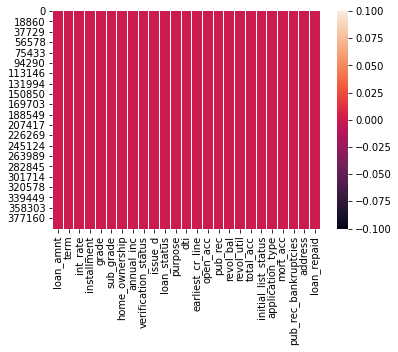

In [111]:
sns.heatmap(df.isnull())

In [112]:
df.head(3)

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,16000,36 months,6.03,486.97,A,A1,MORTGAGE,50000.0,Source Verified,Oct-12,Fully Paid,major_purchase,20.33,Sep-03,12,0,2463,14.0,28,f,INDIVIDUAL,2.0,0.0,"905 Krause Valley\nEast Adam, NE 00813",1
1,12000,36 months,5.32,361.38,A,A1,RENT,97000.0,Verified,May-15,Fully Paid,debt_consolidation,0.31,Mar-95,12,0,48,0.0,32,w,INDIVIDUAL,0.0,0.0,"682 Fisher Divide\nWilliamsfort, SD 22690",1
2,8000,36 months,5.32,240.92,A,A1,OWN,140000.0,Not Verified,Oct-15,Fully Paid,credit_card,11.01,Nov-93,11,0,10587,14.4,23,f,INDIVIDUAL,1.0,0.0,"3635 Lewis Light\nAudreyborough, NC 05113",1


In [113]:
##useful method to select only the string columns in a dataframe

In [114]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [115]:
##hot encoding 

In [116]:
df['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [117]:
df['term']=df['term'].apply(lambda x: int(x[:3]))

In [118]:
df.head(3)

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,16000,36,6.03,486.97,A,A1,MORTGAGE,50000.0,Source Verified,Oct-12,Fully Paid,major_purchase,20.33,Sep-03,12,0,2463,14.0,28,f,INDIVIDUAL,2.0,0.0,"905 Krause Valley\nEast Adam, NE 00813",1
1,12000,36,5.32,361.38,A,A1,RENT,97000.0,Verified,May-15,Fully Paid,debt_consolidation,0.31,Mar-95,12,0,48,0.0,32,w,INDIVIDUAL,0.0,0.0,"682 Fisher Divide\nWilliamsfort, SD 22690",1
2,8000,36,5.32,240.92,A,A1,OWN,140000.0,Not Verified,Oct-15,Fully Paid,credit_card,11.01,Nov-93,11,0,10587,14.4,23,f,INDIVIDUAL,1.0,0.0,"3635 Lewis Light\nAudreyborough, NC 05113",1


In [119]:
df['grade'].unique()

array(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype=object)

In [120]:
df.drop(['grade'],axis=1,inplace=True)

In [121]:

x['sub_grade'].unique()

array(['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1',
       'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3',
       'G4', 'G5'], dtype=object)

In [122]:
dummy=pd.get_dummies(df['sub_grade'],columns=['A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1',
       'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3',
       'G4', 'G5'],drop_first=True)

In [123]:
df.drop(['sub_grade'],axis=1,inplace=True)

In [124]:
df=pd.concat([df,dummy],axis=1)

In [125]:
df.head(4)

,loan_amnt,term,int_rate,installment,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D1,D2,D3,D4,D5,E1,E2,E3,E4,E5,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,16000,36,6.03,486.97,MORTGAGE,50000.0,Source Verified,Oct-12,Fully Paid,major_purchase,20.33,Sep-03,12,0,2463,14.0,28,f,INDIVIDUAL,2.0,0.0,"905 Krause Valley\nEast Adam, NE 00813",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,12000,36,5.32,361.38,RENT,97000.0,Verified,May-15,Fully Paid,debt_consolidation,0.31,Mar-95,12,0,48,0.0,32,w,INDIVIDUAL,0.0,0.0,"682 Fisher Divide\nWilliamsfort, SD 22690",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,8000,36,5.32,240.92,OWN,140000.0,Not Verified,Oct-15,Fully Paid,credit_card,11.01,Nov-93,11,0,10587,14.4,23,f,INDIVIDUAL,1.0,0.0,"3635 Lewis Light\nAudreyborough, NC 05113",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,24000,36,6.03,730.46,MORTGAGE,145000.0,Verified,Jan-15,Charged Off,debt_consolidation,15.98,Oct-86,15,0,44452,26.5,32,w,INDIVIDUAL,1.0,0.0,"22043 Monica Estates\nFieldschester, NC 11650",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [126]:
df.select_dtypes([object]).columns

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [127]:
df['issue_d'].nunique()

112

In [128]:
#purpose:14                              *
#'verification_status':3                 *
#'loan_status':2 already conveted to loan repaid column
#home_ownership:6
#:'initial_list_status2                  *
#'application_type':3                    *

In [129]:
dummies=pd.get_dummies(df[['purpose','verification_status','initial_list_status','application_type']],drop_first=True)

In [130]:
df.drop(['purpose','verification_status','initial_list_status','application_type'],axis=1,inplace=True)

In [131]:
df=pd.concat([df,dummies],axis=1)

In [132]:
df.head()

,loan_amnt,term,int_rate,installment,home_ownership,annual_inc,issue_d,loan_status,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,address,loan_repaid,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D1,D2,D3,D4,D5,E1,E2,E3,E4,E5,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,verification_status_Source Verified,verification_status_Verified,initial_list_status_w,application_type_INDIVIDUAL,application_type_JOINT
0,16000,36,6.03,486.97,MORTGAGE,50000.0,Oct-12,Fully Paid,20.33,Sep-03,12,0,2463,14.0,28,2.0,0.0,"905 Krause Valley\nEast Adam, NE 00813",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,12000,36,5.32,361.38,RENT,97000.0,May-15,Fully Paid,0.31,Mar-95,12,0,48,0.0,32,0.0,0.0,"682 Fisher Divide\nWilliamsfort, SD 22690",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0
2,8000,36,5.32,240.92,OWN,140000.0,Oct-15,Fully Paid,11.01,Nov-93,11,0,10587,14.4,23,1.0,0.0,"3635 Lewis Light\nAudreyborough, NC 05113",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,24000,36,6.03,730.46,MORTGAGE,145000.0,Jan-15,Charged Off,15.98,Oct-86,15,0,44452,26.5,32,1.0,0.0,"22043 Monica Estates\nFieldschester, NC 11650",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0
4,21000,36,6.03,639.15,RENT,105000.0,Jul-14,Fully Paid,12.49,Aug-97,11,0,21088,28.8,40,2.0,0.0,"06895 Kramer Canyon\nSouth Bernardhaven, CT 05113",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0


In [133]:
df.select_dtypes([object]).columns

Index(['home_ownership', 'issue_d', 'loan_status', 'earliest_cr_line',
       'address'],
      dtype='object')

In [134]:
df['home_ownership'].nunique()

6

In [135]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [136]:
def home(x1):
  if x1=='NONE':
    return 'OTHER'
  if x1=='ANY':
    return 'OTHER'
  else:
    return x1

In [137]:
df['home_ownership']=df['home_ownership'].apply(lambda x1:home(x1))

In [138]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

In [139]:
dum=pd.get_dummies(df['home_ownership'],drop_first=True)

In [140]:
df.drop(['home_ownership'],axis=1,inplace=True)

In [141]:
df=pd.concat([df,dum],axis=1)

In [142]:
df.head()

,loan_amnt,term,int_rate,installment,annual_inc,issue_d,loan_status,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,address,loan_repaid,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D1,D2,D3,D4,D5,E1,E2,E3,E4,E5,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,verification_status_Source Verified,verification_status_Verified,initial_list_status_w,application_type_INDIVIDUAL,application_type_JOINT,OTHER,OWN,RENT
0,16000,36,6.03,486.97,50000.0,Oct-12,Fully Paid,20.33,Sep-03,12,0,2463,14.0,28,2.0,0.0,"905 Krause Valley\nEast Adam, NE 00813",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,12000,36,5.32,361.38,97000.0,May-15,Fully Paid,0.31,Mar-95,12,0,48,0.0,32,0.0,0.0,"682 Fisher Divide\nWilliamsfort, SD 22690",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1
2,8000,36,5.32,240.92,140000.0,Oct-15,Fully Paid,11.01,Nov-93,11,0,10587,14.4,23,1.0,0.0,"3635 Lewis Light\nAudreyborough, NC 05113",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,24000,36,6.03,730.46,145000.0,Jan-15,Charged Off,15.98,Oct-86,15,0,44452,26.5,32,1.0,0.0,"22043 Monica Estates\nFieldschester, NC 11650",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0
4,21000,36,6.03,639.15,105000.0,Jul-14,Fully Paid,12.49,Aug-97,11,0,21088,28.8,40,2.0,0.0,"06895 Kramer Canyon\nSouth Bernardhaven, CT 05113",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1


In [143]:
df.select_dtypes([object]).columns

Index(['issue_d', 'loan_status', 'earliest_cr_line', 'address'], dtype='object')

In [144]:
df.drop(['loan_status'],axis=1,inplace=True)

In [145]:
df.head(3)

,loan_amnt,term,int_rate,installment,annual_inc,issue_d,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,address,loan_repaid,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D1,D2,D3,D4,D5,E1,E2,E3,E4,E5,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,verification_status_Source Verified,verification_status_Verified,initial_list_status_w,application_type_INDIVIDUAL,application_type_JOINT,OTHER,OWN,RENT
0,16000,36,6.03,486.97,50000.0,Oct-12,20.33,Sep-03,12,0,2463,14.0,28,2.0,0.0,"905 Krause Valley\nEast Adam, NE 00813",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,12000,36,5.32,361.38,97000.0,May-15,0.31,Mar-95,12,0,48,0.0,32,0.0,0.0,"682 Fisher Divide\nWilliamsfort, SD 22690",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1
2,8000,36,5.32,240.92,140000.0,Oct-15,11.01,Nov-93,11,0,10587,14.4,23,1.0,0.0,"3635 Lewis Light\nAudreyborough, NC 05113",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [146]:
df.drop(['issue_d'],axis=1,inplace=True)

In [147]:
df.head(3)

,loan_amnt,term,int_rate,installment,annual_inc,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,address,loan_repaid,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D1,D2,D3,D4,D5,E1,E2,E3,E4,E5,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,verification_status_Source Verified,verification_status_Verified,initial_list_status_w,application_type_INDIVIDUAL,application_type_JOINT,OTHER,OWN,RENT
0,16000,36,6.03,486.97,50000.0,20.33,Sep-03,12,0,2463,14.0,28,2.0,0.0,"905 Krause Valley\nEast Adam, NE 00813",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,12000,36,5.32,361.38,97000.0,0.31,Mar-95,12,0,48,0.0,32,0.0,0.0,"682 Fisher Divide\nWilliamsfort, SD 22690",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1
2,8000,36,5.32,240.92,140000.0,11.01,Nov-93,11,0,10587,14.4,23,1.0,0.0,"3635 Lewis Light\nAudreyborough, NC 05113",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [148]:
df['address'].iloc[1].split()[-1]

'22690'

In [155]:
df.head(5)

,loan_amnt,term,int_rate,installment,annual_inc,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,address,loan_repaid,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D1,D2,D3,D4,D5,E1,E2,E3,E4,E5,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,verification_status_Source Verified,verification_status_Verified,initial_list_status_w,application_type_INDIVIDUAL,application_type_JOINT,OTHER,OWN,RENT
0,16000,36,6.03,486.97,50000.0,20.33,Sep-03,12,0,2463,14.0,28,2.0,0.0,"905 Krause Valley\nEast Adam, NE 00813",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,12000,36,5.32,361.38,97000.0,0.31,Mar-95,12,0,48,0.0,32,0.0,0.0,"682 Fisher Divide\nWilliamsfort, SD 22690",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1
2,8000,36,5.32,240.92,140000.0,11.01,Nov-93,11,0,10587,14.4,23,1.0,0.0,"3635 Lewis Light\nAudreyborough, NC 05113",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,24000,36,6.03,730.46,145000.0,15.98,Oct-86,15,0,44452,26.5,32,1.0,0.0,"22043 Monica Estates\nFieldschester, NC 11650",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0
4,21000,36,6.03,639.15,105000.0,12.49,Aug-97,11,0,21088,28.8,40,2.0,0.0,"06895 Kramer Canyon\nSouth Bernardhaven, CT 05113",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1


In [156]:
def zipcode(x):
  k=x.split()
  return int(k[-1])

In [157]:
df['address']=df['address'].apply(lambda x: zipcode(x))


In [158]:
df.columns=['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'dti',
       'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'mort_acc', 'pub_rec_bankruptcies', 'zipcode',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5', 'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding',
       'verification_status_Source Verified', 'verification_status_Verified',
       'initial_list_status_w', 'application_type_INDIVIDUAL',
       'application_type_JOINT', 'OTHER', 'OWN', 'RENT']

In [159]:
df.head(3)

,loan_amnt,term,int_rate,installment,annual_inc,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,zipcode,loan_repaid,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D1,D2,D3,D4,D5,E1,E2,E3,E4,E5,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,verification_status_Source Verified,verification_status_Verified,initial_list_status_w,application_type_INDIVIDUAL,application_type_JOINT,OTHER,OWN,RENT
0,16000,36,6.03,486.97,50000.0,20.33,Sep-03,12,0,2463,14.0,28,2.0,0.0,813,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,12000,36,5.32,361.38,97000.0,0.31,Mar-95,12,0,48,0.0,32,0.0,0.0,22690,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1
2,8000,36,5.32,240.92,140000.0,11.01,Nov-93,11,0,10587,14.4,23,1.0,0.0,5113,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [160]:
dummy=pd.get_dummies(df['zipcode'],drop_first=True)

In [161]:
df.drop('zipcode',axis=1,inplace=True)

In [162]:
df=pd.concat([df,dummy],axis=1)

In [163]:
df.head(3)

,loan_amnt,term,int_rate,installment,annual_inc,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,loan_repaid,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D1,D2,D3,D4,D5,E1,E2,E3,E4,E5,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,verification_status_Source Verified,verification_status_Verified,initial_list_status_w,application_type_INDIVIDUAL,application_type_JOINT,OTHER,OWN,RENT,5113,11650,22690,29597,30723,48052,70466,86630,93700
0,16000,36,6.03,486.97,50000.0,20.33,Sep-03,12,0,2463,14.0,28,2.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,12000,36,5.32,361.38,97000.0,0.31,Mar-95,12,0,48,0.0,32,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0
2,8000,36,5.32,240.92,140000.0,11.01,Nov-93,11,0,10587,14.4,23,1.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0


In [164]:
desp('earliest_cr_line')

The month the borrower's earliest reported credit line was opened


In [165]:
x=df

In [166]:
x['earliest_cr_line']=pd.to_datetime(x['earliest_cr_line'],errors = 'coerce')

In [167]:
x.head(7)

,loan_amnt,term,int_rate,installment,annual_inc,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,loan_repaid,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D1,D2,D3,D4,D5,E1,E2,E3,E4,E5,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,verification_status_Source Verified,verification_status_Verified,initial_list_status_w,application_type_INDIVIDUAL,application_type_JOINT,OTHER,OWN,RENT,5113,11650,22690,29597,30723,48052,70466,86630,93700
0,16000,36,6.03,486.97,50000.0,20.33,NaT,12,0,2463,14.0,28,2.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,12000,36,5.32,361.38,97000.0,0.31,1995-03-01,12,0,48,0.0,32,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0
2,8000,36,5.32,240.92,140000.0,11.01,1993-11-01,11,0,10587,14.4,23,1.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0
3,24000,36,6.03,730.46,145000.0,15.98,1986-10-01,15,0,44452,26.5,32,1.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0
4,21000,36,6.03,639.15,105000.0,12.49,1997-08-01,11,0,21088,28.8,40,2.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0
5,15000,36,6.03,456.54,90000.0,13.99,NaT,7,0,4956,11.8,12,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0
6,7000,36,6.03,213.05,88000.0,15.01,1983-05-01,19,0,6243,5.0,63,7.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [168]:
df.head()

,loan_amnt,term,int_rate,installment,annual_inc,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,loan_repaid,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D1,D2,D3,D4,D5,E1,E2,E3,E4,E5,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,verification_status_Source Verified,verification_status_Verified,initial_list_status_w,application_type_INDIVIDUAL,application_type_JOINT,OTHER,OWN,RENT,5113,11650,22690,29597,30723,48052,70466,86630,93700
0,16000,36,6.03,486.97,50000.0,20.33,NaT,12,0,2463,14.0,28,2.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,12000,36,5.32,361.38,97000.0,0.31,1995-03-01,12,0,48,0.0,32,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0
2,8000,36,5.32,240.92,140000.0,11.01,1993-11-01,11,0,10587,14.4,23,1.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0
3,24000,36,6.03,730.46,145000.0,15.98,1986-10-01,15,0,44452,26.5,32,1.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0
4,21000,36,6.03,639.15,105000.0,12.49,1997-08-01,11,0,21088,28.8,40,2.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0


In [169]:
df.drop(['earliest_cr_line'],axis=1,inplace=True)

In [170]:
df.head()

,loan_amnt,term,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,loan_repaid,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D1,D2,D3,D4,D5,E1,E2,E3,E4,E5,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,verification_status_Source Verified,verification_status_Verified,initial_list_status_w,application_type_INDIVIDUAL,application_type_JOINT,OTHER,OWN,RENT,5113,11650,22690,29597,30723,48052,70466,86630,93700
0,16000,36,6.03,486.97,50000.0,20.33,12,0,2463,14.0,28,2.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,12000,36,5.32,361.38,97000.0,0.31,12,0,48,0.0,32,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0
2,8000,36,5.32,240.92,140000.0,11.01,11,0,10587,14.4,23,1.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0
3,24000,36,6.03,730.46,145000.0,15.98,15,0,44452,26.5,32,1.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0
4,21000,36,6.03,639.15,105000.0,12.49,11,0,21088,28.8,40,2.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0


In [246]:
df.select_dtypes([object]).columns

Index([], dtype='object')

In [281]:
from sklearn.model_selection import train_test_split

In [282]:
df.drop(['loan_repaid'],axis=1).values

array([[1.6000e+04, 3.6000e+01, 6.0300e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.2000e+04, 3.6000e+01, 5.3200e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [8.0000e+03, 3.6000e+01, 5.3200e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       ...,
       [1.4325e+04, 6.0000e+01, 2.6060e+01, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.5975e+04, 6.0000e+01, 2.6060e+01, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       [1.0200e+04, 6.0000e+01, 2.6060e+01, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00]])

In [283]:
X=df.drop(['loan_repaid'],axis=1).values
y=df['loan_repaid'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [284]:
from sklearn.preprocessing import MinMaxScaler

In [285]:
scaler=MinMaxScaler()

In [286]:
scaler=scaler.fit(X_train)

In [287]:
X_train=scaler.transform(X_train)

In [288]:
X_test=scaler.transform(X_test)

In [289]:
## creating the model

In [290]:
import tensorflow as tf

In [291]:
from tensorflow.keras.models import Sequential

In [292]:
from tensorflow.keras.layers import Dense,Dropout

In [293]:
model=Sequential()

In [294]:
X_train.shape

(316175, 77)

In [295]:
model.add(Dense(78,activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(39,activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(19,activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy')

In [296]:
from tensorflow.keras.callbacks  import EarlyStopping

In [297]:
import os
import datetime

In [298]:
earlystop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [299]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [300]:
datetime.datetime.now().strftime('%Y-%m-%d-%H%M')

'2020-10-31-1949'

In [301]:
log_directory='logs\\fit'

In [302]:
board=tf.keras.callbacks.TensorBoard(log_dir=log_directory,histogram_freq=1,
                  write_graph=True,write_images=True,update_freq='epoch',profile_batch=2,embeddings_freq=1)

In [303]:
model.fit(X_train,y_train,epochs=25,verbose=1,validation_data=(X_test,y_test),batch_size=256)


Epoch 1/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2837 - val_loss: 0.2655
Epoch 2/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2628 - val_loss: 0.2630
Epoch 3/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2607 - val_loss: 0.2624
Epoch 4/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2596 - val_loss: 0.2619
Epoch 5/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2586 - val_loss: 0.2634
Epoch 6/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2580 - val_loss: 0.2614
Epoch 7/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2574 - val_loss: 0.2611
Epoch 8/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2567 - val_loss: 0.2616
Epoch 9/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2565 - val_loss: 0.2613
Epoch 10/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.256

In [304]:
hist=pd.DataFrame(model.history.history)

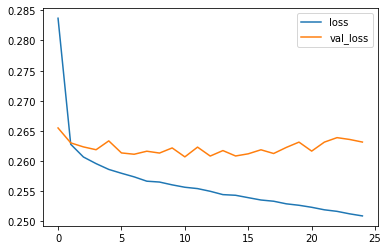

In [305]:
hist.plot()

In [344]:
X_test.shape

(79044, 77)

In [329]:
prediction=model.predict_classes(X_test)

In [307]:
#WARNING:tensorflow:From <ipython-input-306-fddd5d0ad77b>:1: Sequential.predict_classes (from tensorflow.python.keras.engine.sequential) is deprecated and will be removed after 2021-01-01.
#Instructions for updating:
#Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).

In [321]:
y_test=y_test.reshape(79044,)

In [322]:
y_test=pd.Series(y_test)

In [323]:
pred.shape

(79044, 1)

In [324]:
pred=pd.DataFrame(data=pred,columns=['predicted_values'])

In [325]:
pred=pd.concat([pred,y_test],axis=1)

In [326]:
pred

,predicted_values,0
0,1,1
1,0,0
2,1,0
3,1,1
4,1,1
...,...,...
79039,1,1
79040,1,1
79041,1,1
79042,1,1


In [327]:
pred.columns=['predicted_values','actual_values']

In [328]:
from sklearn.metrics import classification_report,confusion_matrix

In [330]:
print(confusion_matrix(y_test,prediction))

[[ 7067  8599]
 [  356 63022]]


In [331]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.95      0.45      0.61     15666
           1       0.88      0.99      0.93     63378

    accuracy                           0.89     79044
   macro avg       0.92      0.72      0.77     79044
weighted avg       0.89      0.89      0.87     79044



In [334]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))
print(random_ind)
new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

304691


loan_amnt      12700.00
term              60.00
int_rate          14.91
installment      301.54
annual_inc     50000.00
                 ...   
30723              0.00
48052              0.00
70466              0.00
86630              0.00
93700              0.00
Name: 305293, Length: 77, dtype: float64

In [349]:
 k=df.drop('loan_repaid',axis=1).iloc[304690].values

In [350]:
k=k.reshape(1,77)

In [351]:
model.predict_classes(k)

array([[1]], dtype=int32)

In [352]:
df['loan_repaid'].iloc[304690]

1